# 1D Free Space

In [1]:
import numpy as np
import matplotlib.pyplot as plt


$$ \tilde{E} = \sqrt{\frac{ε₀}{μ₀}}E $$

$$ \dot{𝐄} = \frac{1}{ε₀} ∇×𝐇 \tag{1} $$

$$ \dot{𝐇} = -\frac{1}{μ₀} ∇×𝐄 \tag{2} $$

$$ \dot{𝐃} = ∇×𝐇 \tag{3} $$

$$ 𝐃 = ε𝐄 + 𝐏 \tag{4} $$

$ 𝐏 = 0 $ - non - dialectric (no polarization)

$$ 𝐇 = (1/μ₀) 𝐁 - 𝐌 $$

$ 𝐌 = 0 $ - non-magnetic (no magnetization)

$$ 𝐃 = ε𝐄 + 𝐏 $$

$ ε = ε₀εᵣ$

$$ 𝐉 = 𝐉_{f}+∇×𝐌+\dot{𝐏} $$

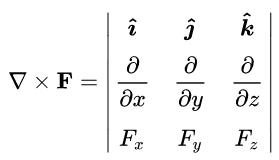
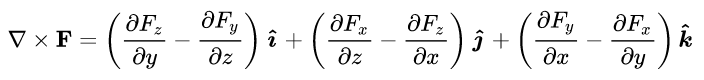

$(1)$ and $(2)$ in 1D

$$ \dot{E_x} = -\frac{1}{ε₀} \frac{∂H_{y}}{∂z} $$
$$ \dot{H_y} = -\frac{1}{μ₀} \frac{∂E_{x}}{∂z} $$



FD

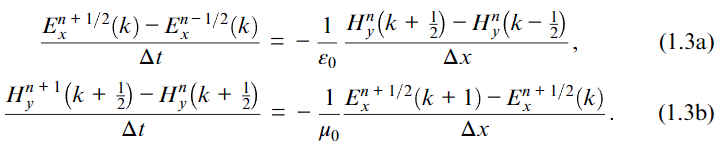

$n$ - time step, $t=nΔt$

$(k)$ - distance, $z=kΔk$

$(1.3a) \& (1.3b) → $

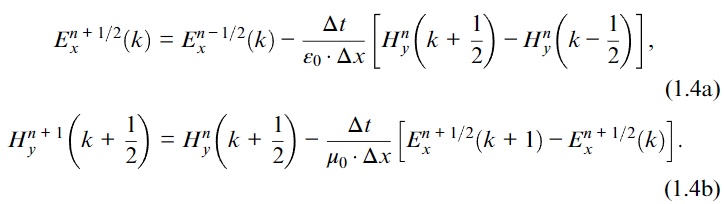

$$ \tilde{E} = \sqrt{\frac{ε₀}{μ₀}} \tag{1.5} $$

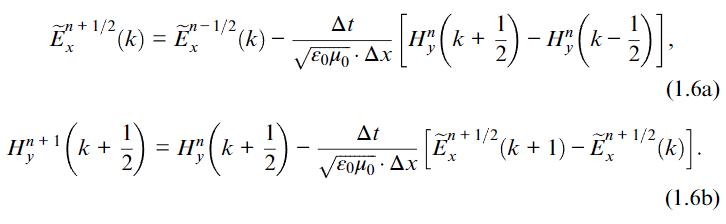

$ c₀ = \frac{1}{\sqrt{ε₀μ₀}} $

Choose $Δx$ 

$$ Δt = \frac{Δx}{2c₀} \tag{1.7} $$

$$ \frac{Δt}{\sqrt{ε₀μ₀} Δx} = \frac{Δx}{2c₀} \frac{1}{\sqrt{ε₀μ₀}Δx} = \frac{1}{2} \tag{1.8} $$

$(1.6a) (1.6b) → $

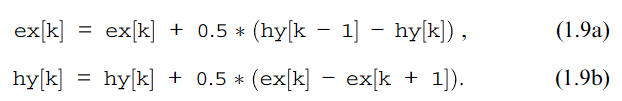

In [6]:
ke = 200

ex = np.zeros(ke)
hy = np.zeros(ke)

# Pulse params

kc = ke // 2
t0 = 40
spread = 12

nsteps = 100

In [7]:
# FDTD loop
for ts in range(1, nsteps + 1):
    # Ex field
    for k in range(1, ke):
        ex[k] = ex[k] + 0.5 * (hy[k - 1] - hy[k])

    # gaussian pulse in the middle
    pulse = np.exp(-0.5 * ((t0 - ts) / spread) ** 2)
    ex[kc] = pulse

    # Hy field
    for k in range(ke - 1):
        hy[k] = hy[k] + 0.5 * (ex[k] - ex[k + 1])

Text(100, 0.5, 'T = 100')

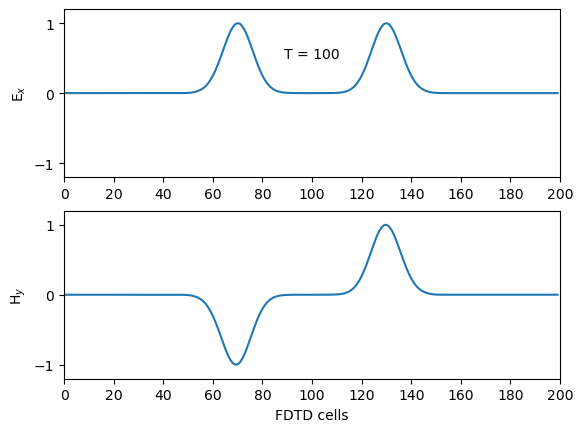

In [8]:
# Plot the outputs as shown in Fig. 1.2

fig, [ax0, ax1] = plt.subplots(2, 1)

ax0.plot(ex)
ax1.plot(hy)

_params = dict(
    xticks=np.arange(0, 201, step=20),
    yticks=np.arange(-1, 1.2, step=1),
    xlim=(0, 200),
    ylim=(-1.2, 1.2),
)

ax0.set(ylabel="E$_x$", **_params)
ax1.set(ylabel="H$_y$", xlabel="FDTD cells", **_params)

ax0.text(100, 0.5, f"T = {ts}", horizontalalignment="center")
